# Tasca M04 - T01

##  Exercici 1

Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.

Crea almenys una visualització per:

Una variable categòrica (Districte o Barri)
Una variable numèrica (Preu)
Una variable numèrica i una categòrica (Districte i Preu)
Dues variables numèriques (Any o Trimestre i Preu)
Tres variables (Barri o Districte, Trimestre i Preu)

In [1]:
#importación de las librerías
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carga del dataset

lloguer_barris = pd.read_csv("preu lloguer per trimestre i barri.csv")
lloguer_barris

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [3]:
# utilización del metodo info para describir el dataset
lloguer_barris.info()
lloguer_barris.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


(584, 8)

## Análisis preliminar del dataset

Tenemos un dataset de 8 columnas y 584 líneas que informa sobre el precio medio del alquiler en la ciudad de barcelona teniendo en cuenta las siguientes variables: 
- Any: el dataset refiere información del año 2021. Sin nulos. Dtype: int64
- Trimestre: refiere a los cuatro trimestres del año (1,2,3,4). Sin nulos. Dtype: int64
- Codi_Districte: incluye la númeración de los 10 distritos de barcelona. Sin nulos. Dtype: int64
- Nom_Districte: asigna un nombre a cada uno de los códigos de Distrito. Sin nulos. Dtype: object
- Codi_Barri: codificación de los 73 barrios de Barcelona (de 1 a 73). Sin nulos. Dtype: int64
- Nom_Barri: asigna un nombre a cada uno de los 73 códigos de barrios. Sin nulos. Dtype: object
- Lloguer_mitja: incluye el nombre de dos forma distintas de medir el precio del alquiler: Lloguer mitjà mensual (Euros/mes) y Lloguer mitjà per superfície (Euros/m2 mes). Sin nulos. Dtype: object. 
- Preu: precio medio del alquiler medido con la categoría asignada en la columna Lloguer_mitja. Sin nulos. Dtype: object. 

De la descripción anterior podemos concluir parcialmente que: 
- En principio el dataset no tiene datos nulos. 
- El datatype de la columna Preu no es correcto. Asignaremos un datatype float64. 

In [4]:
#Cambiamos el formato de la columna "Preu" con el método .astype()
lloguer_barris["Preu"] = lloguer_barris["Preu"].astype("float64")

ValueError: could not convert string to float: '--'

El error en la utilización del método .astype() nos indica que los nulos de la columna "Price" fueron marcados con el string "--". Por esta razón, para cambiar el formato de dicha columna primero tenemos que transformar los string "--" en nulos. Utilizaremos el método .replace () y luego volveremos a pasar el método astype()

In [5]:
# método .replace() para transformar "--" en None
lloguer_barris["Preu"].replace({"--": None}, inplace=True)

In [6]:
#Volvemos a intentar cambiar el formato de la columna "Preu" con el método.astype()
lloguer_barris["Preu"] = lloguer_barris["Preu"].astype("float64")

In [7]:
#Comprobamos que los formatos de las columnas sean correctos
lloguer_barris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB


## Análisis de nulos 

Comenzaremos utilizando los métodos .isnull() y .sum() para detectar los nulos en las diferentes columnas. 

Como resultado tenemos 44 nulos en la columna Preu. 

In [8]:
#utilización del método .isnull y .sum para determinar la suma de nulos por columna
lloguer_barris.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              44
dtype: int64

Revisemos las observaciones con nulos de la columna Preu para determinar qué podríamos hacer con ellos. 

Despues de agrupar el dataset podemos observar que:
- Tenemos nulos en observaciones que en la columna "Lloguer_mitja" pertenecen tanto a las categoría "Lloguer mitjà mensual (Euros/mes)" como a la categoría "Lloguer mitjà per superfície (Euros/m2 mes)"
- Solo existen valores nulos en observaciones pertenecientes a las códigos de distrito 3, 7, 8 y 9.

Ahora bien con estas observaciones podemos concluir que: 
- El conjunto de nulos es casi el 7% del dataset por lo cual tendríamos que imputar su media o mediana. 
- Es imposible imputar una misma media o mediana a toda la columna "Preu" por cuanto los valores difieren según su pertenencia a un "Codi_Districte" y a uno de los valores de "Lloguer_mitja"

In [9]:
lloguer_barris[lloguer_barris["Preu"].isnull()].groupby("Lloguer_mitja")["Preu"].sum()

Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              0.0
Lloguer mitjà per superfície (Euros/m2 mes)    0.0
Name: Preu, dtype: float64

In [10]:
lloguer_barris[lloguer_barris["Preu"].isnull()].groupby("Codi_Districte")["Preu"].sum()

Codi_Districte
3    0.0
7    0.0
8    0.0
9    0.0
Name: Preu, dtype: float64

### ¿Imputar media o de mediana?

Para determinar la imputación de la media o la mediana realizaré una descripción estadística de las columna "Preu" según "Codi_Districte" y "Lloguer_mitja". 

Luego dibujaremos un histograma de uno de los distritos que tienen nulos (San Andreu) por cada una de las categorías de "Lloguer_mitja" para determinar así si imputar la media o la mediana. Aquí no utilizaré plt sino la función .hist() de pd. plt lo usaré en la sección de análisis de variables. 

A partir de los histogramas podemos detectar que las dos categorías de la variable "Preu" -Lloguer mitjà mensual (Euros/mes) y Lloguer mitjà per superfície (Euros/m2 mes)- no presentan distribuciones normales por lo cual decidimos imputar la mediana. 

In [11]:
#Agrupamos precio por nombre de distrito y lloguer_mitja y agregamos funciones de estadística descriptiva
lloguer_barris.groupby(["Nom_Districte", "Lloguer_mitja"])["Preu"].agg([np.mean, np.median, np.max, np.min])

mean  \
Nom_Districte       Lloguer_mitja                                              
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)             858.925000   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.775000   
Eixample            Lloguer mitjà mensual (Euros/mes)            1000.545833   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.300000   
Gràcia              Lloguer mitjà mensual (Euros/mes)             877.265000   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.380000   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)             765.007500   
                    Lloguer mitjà per superfície (Euros/m2 mes)    11.987500   
Les Corts           Lloguer mitjà mensual (Euros/mes)            1214.066667   
                    Lloguer mitjà per superfície (Euros/m2 mes)    14.008333   
Nou Barris          Lloguer mitjà mensual (Euros/mes)             664.292500   
                    Lloguer mitjà per superfície (Euros/m2 mes)    10.922500   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)             721.196154   
                    Lloguer mitjà per superfície (Euros/m2 mes)    11.153846   
Sant Martí          Lloguer mitjà mensual (Euros/mes)             916.450000   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.440000   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)             798.932143   
                    Lloguer mitjà per superfície (Euros/m2 mes)    12.678571   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            1271.212500   
                    Lloguer mitjà per superfície (Euros/m2 mes)    15.012500   

                                                                  median  \
Nom_Districte       Lloguer_mitja                                          
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)             870.00   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.20   
Eixample            Lloguer mitjà mensual (Euros/mes)             964.95   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.30   
Gràcia              Lloguer mitjà mensual (Euros/mes)             895.65   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.60   
Horta-Guinardó      Lloguer mitjà mensual (Euros/mes)             756.30   
                    Lloguer mitjà per superfície (Euros/m2 mes)    12.10   
Les Corts           Lloguer mitjà mensual (Euros/mes)            1007.90   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.90   
Nou Barris          Lloguer mitjà mensual (Euros/mes)             671.80   
                    Lloguer mitjà per superfície (Euros/m2 mes)    11.45   
Sant Andreu         Lloguer mitjà mensual (Euros/mes)             755.45   
                    Lloguer mitjà per superfície (Euros/m2 mes)    11.60   
Sant Martí          Lloguer mitjà mensual (Euros/mes)             869.20   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.15   
Sants-Montjuïc      Lloguer mitjà mensual (Euros/mes)             805.25   
                    Lloguer mitjà per superfície (Euros/m2 mes)    13.00   
Sarrià-Sant Gervasi Lloguer mitjà mensual (Euros/mes)            1278.85   
                    Lloguer mitjà per superfície (Euros/m2 mes)    15.10   

                                                                   amax   amin  
Nom_Districte       Lloguer_mitja                                               
Ciutat Vella        Lloguer mitjà mensual (Euros/mes)             968.4  759.2  
                    Lloguer mitjà per superfície (Euros/m2 mes)    16.4   12.3  
Eixample            Lloguer mitjà mensual (Euros/mes)            1220.8  887.1  
                    Lloguer mitjà per superfície (Euros/m2 mes)    14.0   12.5  
Gràcia              Lloguer mitjà mensual (Euros/mes)             961.0  745.4  
                    Lloguer mitjà per superfície (Euros/m2 mes)    14.3

array([[<Axes: title={'center': 'Preu'}>]], dtype=object)

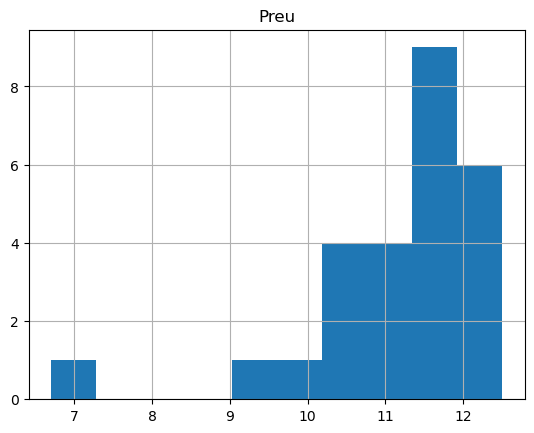

In [12]:
# histograma de Precio de Alquiler por superficie del Distrito de Sant Andreu
lloguer_barris[(lloguer_barris["Nom_Districte"] == "Sant Andreu") & 
               (lloguer_barris["Lloguer_mitja"] == "Lloguer mitjà per superfície (Euros/m2 mes)")
               ].hist(column="Preu")

array([[<Axes: title={'center': 'Preu'}>]], dtype=object)

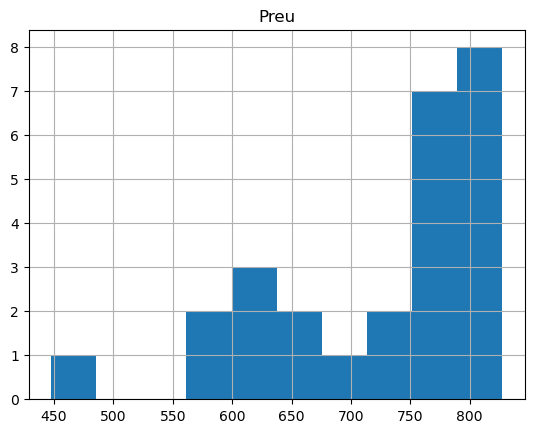

In [13]:
# histograma de Precio de Alquiler por superficie del Distrito de Sant Andreu
lloguer_barris[(lloguer_barris["Nom_Districte"] == "Sant Andreu") & 
               (lloguer_barris["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)")
               ].hist(column="Preu")

### Imputación de la mediana. 

En este caso tenemos una situación particular por cuanto no podemos imputar la misma mediana a los nulos de la columna "Preu". Tenemos que imputar medianas específicas de acuerdo al "Codi_Districte" y el "Lloguer_Mitja". 

Para lograrlo utilizaremos las siguientes funciones: 
.transform() con esta función transformaremos un dataset (en este caso el dataset producido por la agrupación de la columna "Preu" según "Codi_Districte" y "Lloguer_Mitja") que retornará un resultado con el mismo index del dataset original. Es decir que transformaremos la columna "Preu" y su resultado tendrá el mismo index de la columna original. 

Como argumento de .transform() utilizaremos una función lambda que nos indicará bajo qué condiciones queremos transformar el dataset agrupado. En este caso los datos nulos de "Preu" se transformarán en la mediana de las columnas "Códi_Districte" y "Lloguer_Mitja" específicas del index al que pertenece el dato nulo. 

In [14]:
#Combinación de un .groupby con un .transform y una función lamba para imputar las medianas a los nulos de la columna
#Preu según su "Nom_Districte" y su "Lloguer_mitja"

lloguer_barris["Preu"] = lloguer_barris.groupby(["Nom_Districte", "Lloguer_mitja"])["Preu"].transform(lambda x: x.fillna(x.median()))

In [15]:
#Verificamos de nuevo la existencia de nulos
lloguer_barris.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

### Desdoblamiento de la columna "Lloguer_mitja" en sus dos categorías

Otra de las cosas que no estaba bien en este dataset era la inclusión de dos categorías en la columna "Lloguer_mitja" que deberían funcionar más como variables independientes que como datos dentro de una sola columna. 

Crearemos, entonces, dos columnas nuevas cada una de las cuales incluirá los datos de "Preu" según "Lloguer mitjà mensual" o según "Lloguer mitjà per superfície (Euros/m2 mes)". Las llamaremos "Lloguer_mes_mensual" y "Lloguer_mes_superficie". Estas columnas las crearemos aplicando una función lambda row haciendo coincidir las líneas de la columna "Preu" y "Lloguer_mitja" según existe en esta última el string "mensual" para el caso de la columna de media de alquiler por mes y la string "superfície" en el caso de la columna media de alquiler por superficie. En el caso que la condición no se cumpla imputaremos nulo. 

Finalmente, tenemos que agregar que esta actividad no la habíamos realizado antes pues si hubieramos desplegado la columna "Lloguer mitjá" sin antes haber limpiado los nulos de la columna "Preu" el resultado habría sido multiplicar dichos nulos. 

In [16]:
#Creamos columnas nuevas utilizando el método .apply y una función lambda row

lloguer_barris["Lloguer_mes_mensual"] = lloguer_barris.apply(lambda row: row["Preu"] if "mensual" in row["Lloguer_mitja"] else None, axis=1)
lloguer_barris["Lloguer_mes_superficie"] = lloguer_barris.apply(lambda row: row["Preu"] if "superfície" in row["Lloguer_mitja"] else None, axis=1)
lloguer_barris

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer_mes_mensual,Lloguer_mes_superficie
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2,759.2,NaN
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,929.6,NaN
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9,808.9,NaN
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4,879.4,NaN
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0,918.0,NaN
...,...,...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2,NaN,15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8,NaN,10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8,NaN,13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7,NaN,11.7


Ahora bien, al crear las dos columnas nuevas podemos observar que las líneas están incompletas. Aquellas que tienen información en Lloguer_mes_mensual tienen nulos en Lloguer_mes_superficie y viceversa. En este caso después de intentar varias formas para imputar los nulos con los valores correspondientes con la columna correcta encontramos la función "first" que al agregarla a un groupby toma el primer valor no nulo de la agrupación y lo asigna en la columna correspondiente. Añadiremos el argumento as_index=False para que las columnas agrupadas no se usen como index (en este caso "Any", "Trimestre", "Codi_Districte", "Nom_Districte", etc) sino que permanezcan como columnas. Además al no agrupar las columnas "Preu" ni "Lloger_mitja" no harán parte del nuevo dataset.   

In [18]:
#agrupamos las columnas del nuevo dataset y agregamos utilizando la función first para las dos columnas nuevas. 
lloguer_barris_ok = lloguer_barris.groupby(["Any", "Trimestre", "Codi_Districte", "Nom_Districte", "Codi_Barri", "Nom_Barri"], 
                                           as_index=False).agg({'Lloguer_mes_mensual': 'first', 'Lloguer_mes_superficie': 'first'})
lloguer_barris_ok

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mes_mensual,Lloguer_mes_superficie
0,2021,1,1,Ciutat Vella,1,el Raval,759.2,12.8
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,929.6,12.3
2,2021,1,1,Ciutat Vella,3,la Barceloneta,808.9,15.5
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",879.4,13.3
4,2021,1,2,Eixample,5,el Fort Pienc,918.0,12.9
...,...,...,...,...,...,...,...,...
287,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,1205.3,15.2
288,2021,4,10,Sant Martí,70,el Besòs i el Maresme,700.5,10.8
289,2021,4,10,Sant Martí,71,Provençals del Poblenou,977.8,13.8
290,2021,4,10,Sant Martí,72,Sant Martí de Provençals,826.2,11.7


Añadimos una pequeña explicación sobre el uso de la función first. 

En la segmentación de lloguer_barris de abajo podemos ver la agrupación de todas las columnas utilizando como criterios "Trimestre" == 1 y "Codi_Barri" == 2. Podemos observar que el primer valor de Lloguer_mes_superficie es nulo y el segundo es 12.3. En este caso la función first toma el valor 12.3 y lo asigna a la columna Lloguer_mes_superficie. En el caso de la columna Lloguer_mes_mensual el primer valor no nulo es 929.6 por lo que la función first toma este valor y lo asigna a la columna "Lloguer_mes_mensual" y a la línea correspondiente a la agrupación. 

In [19]:
lloguer_barris[(lloguer_barris["Trimestre"] == 1) & (lloguer_barris["Codi_Barri"] == 2)]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Lloguer_mes_mensual,Lloguer_mes_superficie
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6,929.6,NaN
74,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),12.3,NaN,12.3


## Análisis estadístico variables cuantitativas 

El análisis estadístico lo realizaremos sobre las columnas Lloguer_mes_mensual y Lloguer_mes_superficie. El resto de columnas cuantitativas incluyen codificaciones y fechas por lo cual quedarán fueran de este análisis

Empezaremos con un .describe() para tener presentes las estadísticas de las dos columnas cuantitativas

Luego, normalizaremos las dos columnas por cuanto sus escalas son diferentes:LLoguer_mes_mensual se mide en euros al mes, y Lloguer_mes_superficie se mide en euros por m2 al mes 

De matplolib utilizaremos: 
- Barras de error para comparar la media y la desviación estandar de las dos variables. 
- Histogramas para analizar su distribución
- Boxplot para detectar outliers e IRQ.
- Diagrama de dispersión para analizar la correlación entre las dos columnas

In [20]:
#Usamos el método describe para sacar las estadísticas de las dos columnas cuantitativas
lloguer_barris_cuanti=lloguer_barris_ok[["Lloguer_mes_mensual", "Lloguer_mes_superficie"]]
lloguer_barris_cuanti.describe()

,Lloguer_mes_mensual,Lloguer_mes_superficie
count,292.000000,292.000000
mean,860.099315,12.656164
std,216.971886,1.659388
min,447.500000,6.700000
25%,737.175000,11.600000
50%,805.275000,12.700000
75%,927.750000,13.525000
max,1816.500000,18.000000


In [21]:
#Normalización de max-min de las dos columnas (df-df.min())/(df.max()-df.min())
lloguer_barris_normal=(lloguer_barris_cuanti-lloguer_barris_cuanti.min())/(lloguer_barris_cuanti.max()-lloguer_barris_cuanti.min())

In [22]:
#añadimos las variables normalizadas al dataset lloguer_barris_ok
lloguer_barris_ok["Lloguer_mes_mensual_norm"] = lloguer_barris_normal["Lloguer_mes_mensual"]
lloguer_barris_ok["Lloguer_mes_superficie_norm"] = lloguer_barris_normal["Lloguer_mes_superficie"]

In [23]:
# describimos las columnas normalizadas
lloguer_barris_ok[["Lloguer_mes_mensual_norm", "Lloguer_mes_superficie_norm"]].describe()

,Lloguer_mes_mensual_norm,Lloguer_mes_superficie_norm
count,292.000000,292.000000
mean,0.301387,0.527094
std,0.158489,0.146849
min,0.000000,0.000000
25%,0.211596,0.433628
50%,0.261340,0.530973
75%,0.350804,0.603982
max,1.000000,1.000000


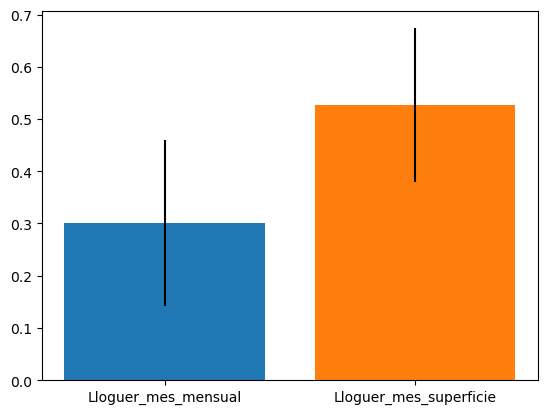

In [28]:
# Barras de error

# Creamos el gráfico
fig, ax = plt.subplots()

#Construimos las barras agregando los argumentos x, y y el valor de yerr
ax.bar("Lloguer_mes_mensual", lloguer_barris_ok["Lloguer_mes_mensual_norm"].mean(),
yerr=lloguer_barris_ok["Lloguer_mes_mensual_norm"].std())

ax.bar("Lloguer_mes_superficie", lloguer_barris_ok["Lloguer_mes_superficie_norm"].mean(),
yerr=lloguer_barris_ok["Lloguer_mes_superficie_norm"].std())

#guardamos el gráfico como .jpg
fig.savefig("bar_errors_lloguer_2021.jpg")

plt.show()

Con el gráfico de barras de error podemos concluir que aunque la media de Lloguer_mes_superficie sea más grande que la de LLoguer_mes_mensual sus desviaciones estándar son bastante similares. Sin embargo, para determinar si la diferencia entre las dos medias es representantiva deberíamos correr una prueba con el T-score, algo que se sale de los objetivos de este ejercicio. 

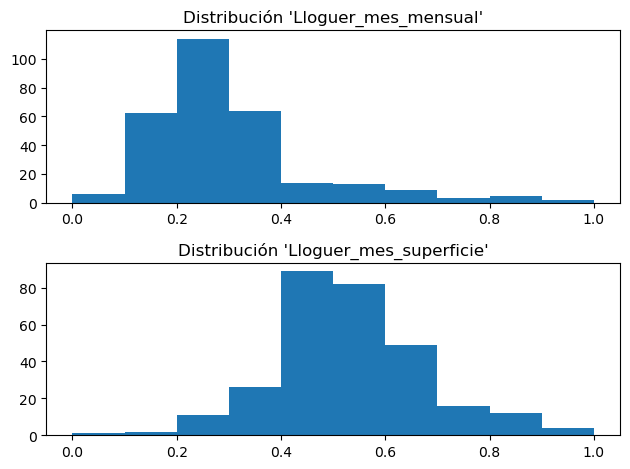

In [29]:
#Histogramas
#construimos cuadrícula con dos líneas y una columna
fig, ax = plt.subplots(2,1)

#dibujamos los histogramas con las variables correspondientes
ax[0].hist(lloguer_barris_normal["Lloguer_mes_mensual"])
ax[1].hist(lloguer_barris_normal["Lloguer_mes_superficie"])

#establecemos títulos para cada una
ax[0].set_title("Distribución 'Lloguer_mes_mensual'")
ax[1].set_title("Distribución 'Lloguer_mes_superficie'")

#ajustamos los títulos a la cuadrícula
fig.tight_layout()

#guardamos el gráfico como .png
fig.savefig("histograms_lloguer_2021.jpg")

#mostramos el gráfico
plt.show()

Con los histogramas por columna podemos concluir que las dos distribuciones son normales, sin embargo: 
- La distribución de la columna "Lloguer_mes_mensual" presenta un right skewed lo que quiere decir que su media es más grande que su mediana. 
- La distribución de la columna "Lloguer_mes_superficie" es central lo que significa que su media y su mediana son similares. 

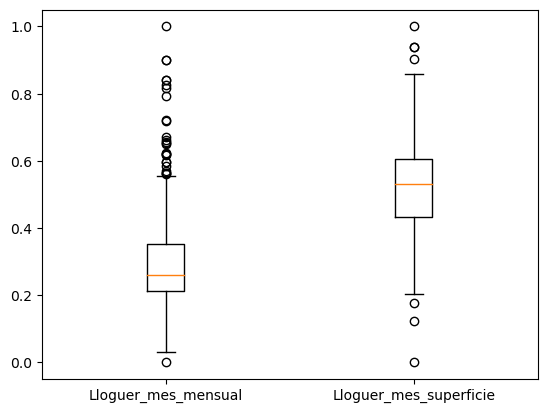

In [30]:
#boxplot

fig, ax = plt.subplots()

#crear lista de las columnas que se van a graficar y utilizarla como argumento del método ax.boxplot()
ax.boxplot([lloguer_barris_normal["Lloguer_mes_mensual"],
       lloguer_barris_normal["Lloguer_mes_superficie"]])

#agregar los labels de las variables
ax.set_xticklabels(["Lloguer_mes_mensual", "Lloguer_mes_superficie"])

plt.show()



Con el boxplot podemos concluir que: 
- Lloguer_mes_mensual tiene muchos más outliers que Lloguer_mes_superficie. Sin embargo, la distribución de los outliers de "Lloguer_mes_superficie" parece más equilibrada (tiene igual número de outliers en su precio mínimo como máximo), mientras que en "Lloguer_mes_mensual" los outliers, en su mayoría, se ubican en los precios máximos y tan solo 1 en los precios mínimos. 
- En este caso la detección de los outliers no servirá para eliminarlos sino para analizar en qué barrios y distritos pueden estar aquellos arriendos más caros y más baratos tanto por Lloguer_mes_mensual como por Lloguer_mes_superficie. 
- El boxplot también nos confirma el skew right de la variable "Lloguer_mes_mensual". 
- Podríamos concluir de manera parcial que con Lloguer_mes_superficie podemos nos entregará una visión más equilibrada del precio del arriendo en Barcelona mientras que Lloguer_mes_mensual nos permitiré hacer enfásis en las desigualdades del alquiler subrayando los precios más altos. 
    

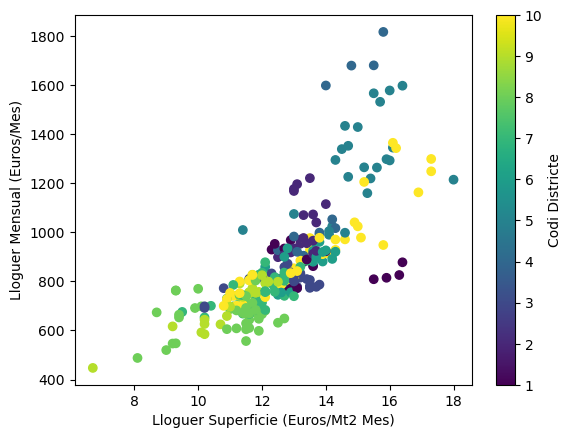

In [32]:
#scatter

#creamos la gráfica
fig, ax = plt.subplots()

#guardamos el scatter en el objeto scatter y añadimos los argumentos al ax.scatter (incluyendo el c y el cmap)
scatter = ax.scatter(lloguer_barris_ok["Lloguer_mes_superficie"], 
           lloguer_barris_ok["Lloguer_mes_mensual"], 
           c=lloguer_barris_ok["Codi_Districte"], 
           cmap='viridis')

#Configuramos el scatter
ax.set_xlabel("Lloguer Superficie (Euros/Mt2 Mes)")
ax.set_ylabel("Lloguer Mensual (Euros/Mes)")

#Añadimos el mapa de color y le asignamos un label
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Codi Districte")

#guardamos el scatter como jpg
fig.savefig("scatter_lloguer_2021.jpg")

plt.show()


El gráfico de dispersión nos demuestra que en general a mayor valor del alquilar por m2, mayor valor del alquiler mensual. Sin embargo, también nos sirve para observar que en los precios más altos de las dos variables la tendencia de correlación se desfigura (por ejemplo, el precio más alto del alquiler mensual, no correponde al precio más alto del alquiler por superficie. Y, al contrario, el precio más alto del alquiler por superficie no corresponde (es más, ni se acerca) al precio más alto del alquier mensual.

Los colores nos indican que: 
-La dispersión de los alquileres del distrito 1 (Sant Marti) es alta. Podemos encontrar que algunos de ellos se ubican entre los valores más altos tanto de alquiler mensual como de superficie
-Los arriendos más bajos tanto en superficie como en media mensual los encontramos en los distritos 9 (Sant Andreu) y 8 (Nou Barris)
-Los distritos 5 (Sarrià-Sant Gervasi) y 6 (Gràcia) cuentan con los arriendos más altos tanto en superficie como en media mensual
-El distrito 10 (Ciutat Vella) también tiene alquileres dispersos. Muchos de ellos se encuentran dentro de la media, pero algunos se ubican en los precios más altos de alquiler por superficie (aunque no en los precios más altos de media mensual). 


In [33]:
Districte_mean_mensual = lloguer_barris_ok.groupby("Nom_Districte", as_index=False)[["Lloguer_mes_mensual", "Lloguer_mes_superficie"]].mean()
Districte_mean_mensual

,Nom_Districte,Lloguer_mes_mensual,Lloguer_mes_superficie
0,Ciutat Vella,858.925000,13.775000
1,Eixample,1000.545833,13.300000
2,Gràcia,877.265000,13.380000
3,Horta-Guinardó,764.215909,11.997727
4,Les Corts,1214.066667,14.008333
5,Nou Barris,666.025000,11.044231
6,Sant Andreu,723.642857,11.185714
7,Sant Martí,916.450000,13.440000
8,Sants-Montjuïc,799.721875,12.718750
9,Sarrià-Sant Gervasi,1271.212500,15.012500


## Visualización de variables categóricas - tamaño de los distritos

Dibujaremos un pie chart para determinar el tamaño de los distritos a partir de la cantidad de barrios que pertenece a cada uno de ellos. 

Según el gráfico el distrito con mayor cantidad de barrios es Nou Barris (13 barrios), mientras que el más pequeño es Les Corts (3 barrios)

Esta información debería ser contrastada con los cantidad de población perteneciente a cada distrito. 


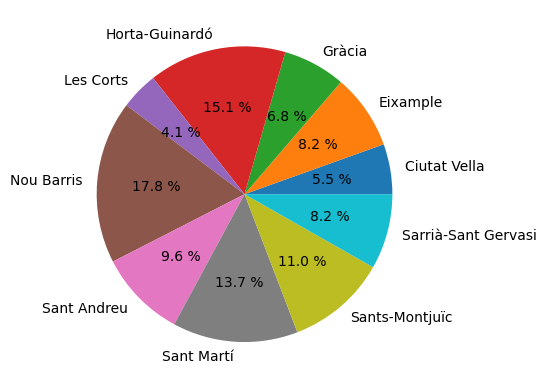

In [34]:
#pie chart
fig, ax = plt.subplots()

#establecemos los label de los trozos como una lista ordenada de los nombres de los distritos.
mylabels = lloguer_barris_ok["Nom_Districte"].sort_values().unique()

#asignamos como argumento el conteo de barrios por distrito. Añadimos argumentos de labels y de porcentajes. 
ax.pie(lloguer_barris_ok.groupby("Nom_Districte")["Nom_Barri"].count(), labels=mylabels, autopct="%0.1f %%")
plt.show()

## Medias de alquiler por mes y de alquiler por superficie mensual por distrito

En estas gráficas de barras podremos comprar las medias de cada una de las variables por distrito. 

En la gráfica de barras podemos comprobar que: 
- Los distritos con mayores alquileres tanto mensuales como por superficie son Sarrià y Les Corts. En estos dos casos las medias de lloguer_mes_mensual y lloguer_mes_superficie no son muy distintas. 
- Los distritos con menos valos del alquiler tanto mensual como por superficie son Sant Andreu y Nou Barris. En estos casos las medias de llogur_mes_mensual y lloguer_mes_superficie si parece que son significativamente diferentes. 
- Hay que señalar que en el caso de Ciutat Vella y Sants la media de lloguer_mes_superficie parece duplicar la media de lloguer_mes_mensual.

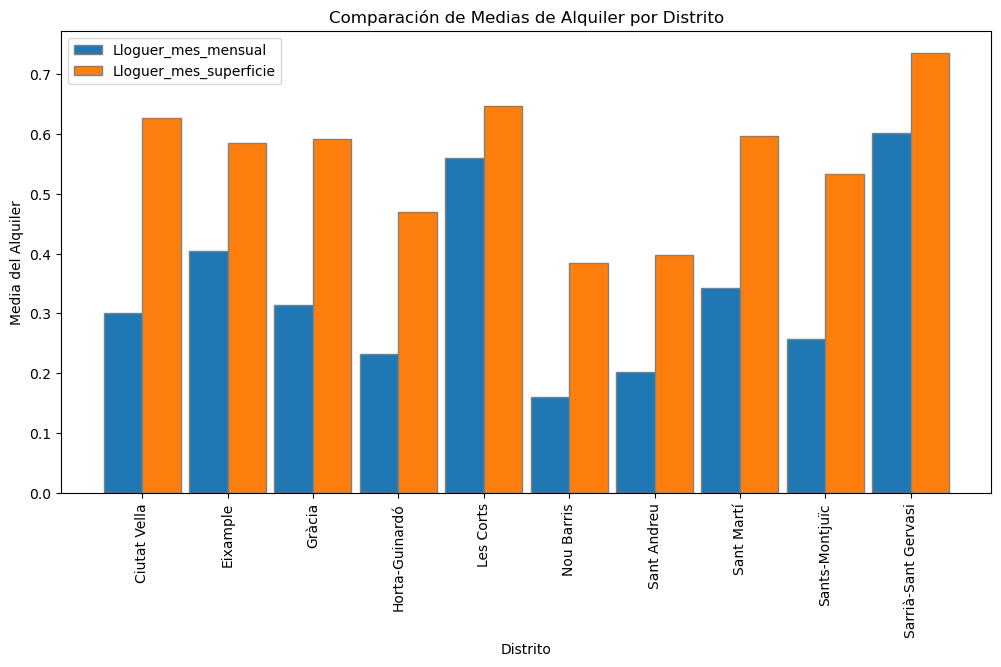

In [37]:
# Calculamos media por distrito de las dos variables normalizadas
medias_por_distrito = lloguer_barris_ok.groupby('Nom_Districte')[['Lloguer_mes_mensual_norm', 'Lloguer_mes_superficie_norm']].mean()

# Creamos el bar plot y asignamos un size que corresponda con la cantidad de información
fig, ax = plt.subplots(figsize=(12, 6))

#asignamos el ancho de cada barra
bar_width = 0.45

# Establecemos la posición de las barras. r1 un range con los 10 distritos. r2 el valor de r1 más el ancho de la barra
# para que las dos esten una al lado de la otra y no una encima de la otra. 
r1 = range(len(medias_por_distrito))
r2 = [x + bar_width for x in r1]

# Establecemos los argumentos para cada una de las barras
ax.bar(r1, medias_por_distrito['Lloguer_mes_mensual_norm'], width=bar_width, edgecolor='grey', label='Lloguer_mes_mensual')
ax.bar(r2, medias_por_distrito['Lloguer_mes_superficie_norm'], width=bar_width, edgecolor='grey', label='Lloguer_mes_superficie')

# Configuración de la gráfica
ax.set_xlabel('Distrito')
ax.set_ylabel('Media del Alquiler')
ax.set_title('Comparación de Medias de Alquiler por Distrito')
ax.set_xticks([r + bar_width / 2 for r in range(len(medias_por_distrito))])
ax.set_xticklabels(medias_por_distrito.index, rotation=90)
ax.legend()

plt.show()

## Análisis temporal 

En el analísis temporal utilizaremos gráficos de línea para estudiar el comportamiento de las variables durante los cuatro trimestres de 2021. 

El primer gráfico ilustra la tendencia general de las dos variables normalizadas. Tanto lloguer_mes_mensual como lloguer_mes_superficie han aumentado su valor en 2021. 

Podemos ser incluso más específicos: Las dos variables tuvieron un descenso en su valor en el primer trimestre, en el segundo ambas tuvieron un aumento pronunciado que se estabilizó en el resto del año. 

Las últimas dos gráficas nos mostrarán el comportamiento de las dos variables por distrito y trimestre

En el caso de lloguer_mes_mensual podemos observar que: 
- El distrito de Sarria comenzó el año con un descenso pronunciado pero lo finalizó con una subida que casi lo pone en su punto de inicio. 
- El distrito de Les Corts tuvo un comportamiento al alza durante los primeros tres trimestres pero en el último su precio descendió
- El distrito de Sant-Martí tuvo un aumento considerable del segundo al trecer trimestre. 
- El comportamiento del resto de distritos permaneció estable. 

En el caso de lloguer_mes_superficie concluimos que: 
- El distrito de Sarria comenzó el año en bajada pero tuvo un aumento considerable durante el último trimestre.
- El comportamiento del distrito de Les Corts fue al contrario. Un aumento en el primer trimestre del año y un descenso en el último. 
- El distrito de Sant-Andreu comenzó el año con un descenso considerable en su valor pero en el segundo trimestre lo recuperó casi todo. 
- El resto de distritos se comportaron de manera bastante regular con una tendencia ascendente muy moderada. 



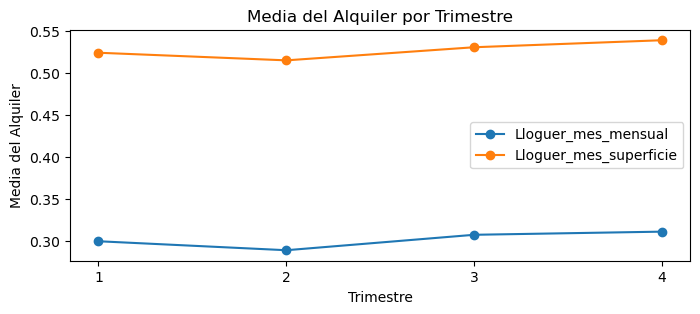

In [38]:
# Calculamos media por trimestre de las dos variables normalizadas
medias_por_trimestre = lloguer_barris_ok.groupby('Trimestre')[['Lloguer_mes_mensual_norm', 'Lloguer_mes_superficie_norm']].mean()

# Creamos el barplot y asignamos tamaño
fig, ax = plt.subplots(figsize=(8, 3))

# Establecemos los argumentos del ax.plot x(trimestre), y (valores) incluyento un marker y un label
ax.plot(medias_por_trimestre.index, medias_por_trimestre['Lloguer_mes_mensual_norm'], marker='o', label='Lloguer_mes_mensual')
ax.plot(medias_por_trimestre.index, medias_por_trimestre['Lloguer_mes_superficie_norm'], marker='o', label='Lloguer_mes_superficie')

# Configuramos la gráfica
ax.set_xlabel('Trimestre')
ax.set_ylabel('Media del Alquiler')
ax.set_xticks([1,2,3,4])
ax.set_title('Media del Alquiler por Trimestre')
ax.legend()

plt.show()


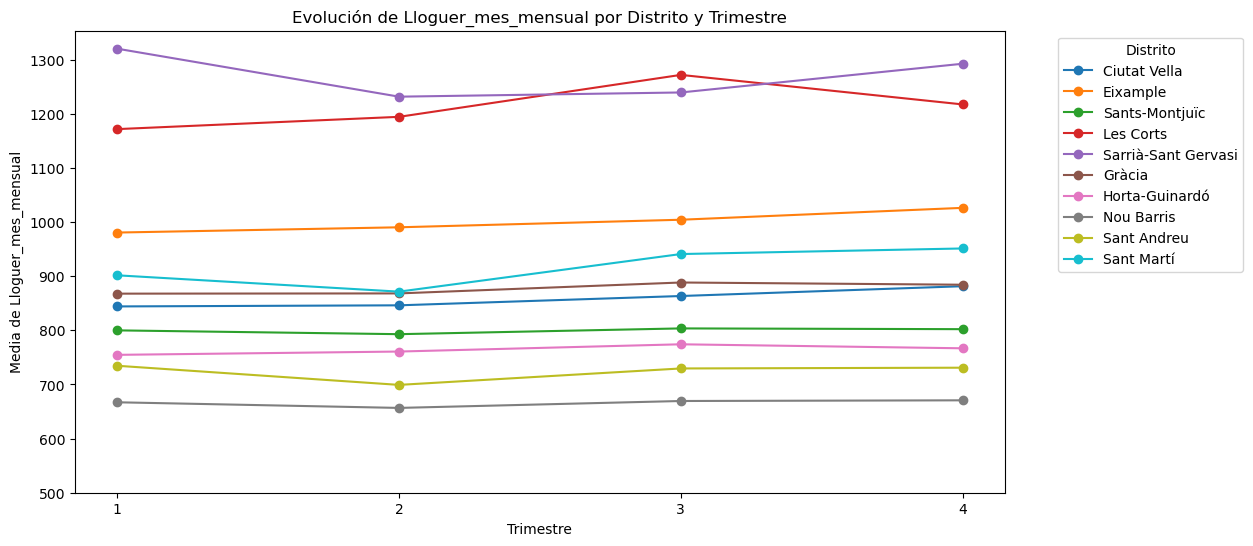

In [39]:
#Creamos un objeto que contenga los nombres de los distritos

distritos_unicos = lloguer_barris_ok['Nom_Districte'].unique()

# Creamosla gráfica y le asignamos un tamaño
fig, ax = plt.subplots(figsize=(12, 6))

# Iterar sobre cada distrito para 
for distrito in distritos_unicos:
    # 1. Filtrar los datos del distrito (su nombre)
    datos_distrito = lloguer_barris_ok[lloguer_barris_ok['Nom_Districte'] == distrito]
    
    # 2. Calcular el promedio de Lloguer_mes_mensual por trimestre
    promedios_por_trimestre = datos_distrito.groupby('Trimestre')['Lloguer_mes_mensual'].mean()
    
    # Establecer los argumentos del plot: x index de trimestre, y los valores de promedio por trimestre
    # markers, tipo de línea y label (el nombre del distrito)
    ax.plot(promedios_por_trimestre.index, promedios_por_trimestre.values, marker='o', linestyle='-', label=distrito)

# Configuramos la gráfica
ax.set_xlabel('Trimestre')
ax.set_xticks([1,2,3,4])
ax.set_ylabel('Media de Lloguer_mes_mensual')
ax.set_title('Evolución de Lloguer_mes_mensual por Distrito y Trimestre')

#Establecemos una escala de y para ver mejor las líneas
ax.set_ylim(bottom=500)

# Añadimos la leyenda fuera del gráfico y configuramos su ubicación y tamaño. 
ax.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()




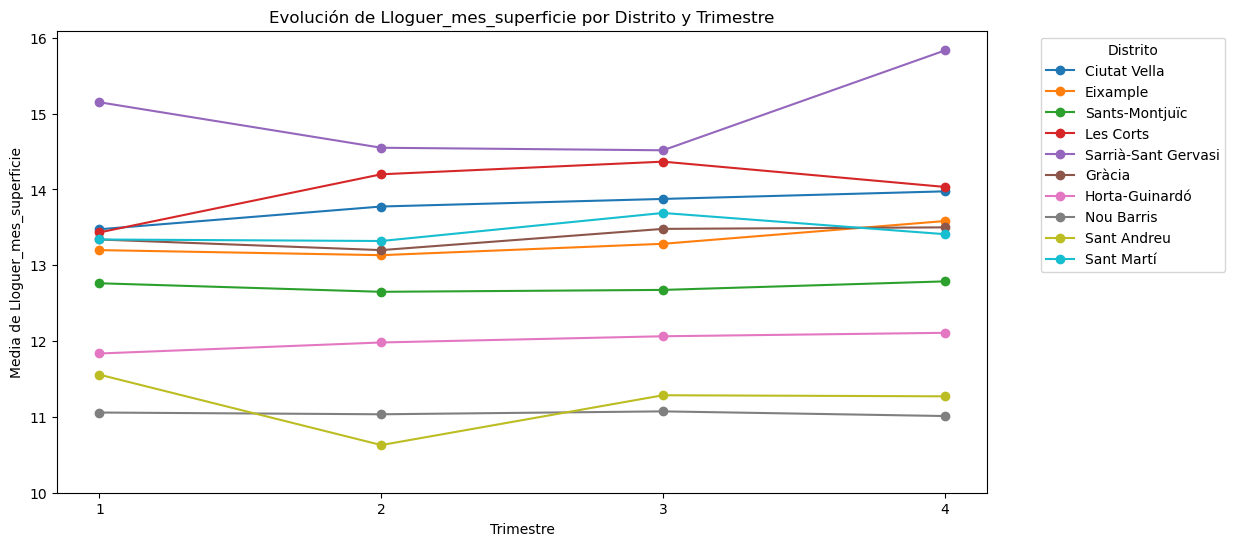

In [40]:
#Creamos un objeto que contenga los nombres de los distritos

distritos_unicos = lloguer_barris_ok['Nom_Districte'].unique()

# Creamosla gráfica y le asignamos un tamaño
fig, ax = plt.subplots(figsize=(12, 6))

# Iterar sobre cada distrito para 
for distrito in distritos_unicos:
    # 1. Filtrar los datos del distrito (su nombre)
    datos_distrito = lloguer_barris_ok[lloguer_barris_ok['Nom_Districte'] == distrito]
    
    # 2. Calcular el promedio de Lloguer_mes_mensual por trimestre
    promedios_por_trimestre = datos_distrito.groupby('Trimestre')['Lloguer_mes_superficie'].mean()
    
    # Establecer los argumentos del plot: x index de trimestre, y los valores de promedio por trimestre
    # markers, tipo de línea y label (el nombre del distrito)
    ax.plot(promedios_por_trimestre.index, promedios_por_trimestre.values, marker='o', linestyle='-', label=distrito)

# Configuramos la gráfica
ax.set_xlabel('Trimestre')
ax.set_xticks([1,2,3,4])
ax.set_ylabel('Media de Lloguer_mes_superficie')
ax.set_title('Evolución de Lloguer_mes_superficie por Distrito y Trimestre')

#Establecemos una escala de y para ver mejor las líneas
ax.set_ylim(bottom=10)

# Añadimos la leyenda fuera del gráfico y configuramos su ubicación y tamaño. 
ax.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


## Exercici 2

Exporta els gràfics com imatges o com HTML.

En las líneas 28, 29 y 32 exporté gráficos como .jpg y como .png